# Allen Institute
## 02_profile
---
## Dataset
- `../data/m1_10x_viz/org_marker+_log.pkl`

## WorkFlow
- make configuration
- a) Heatmap
- b) tSNE
- c) Scatterplot
 
 
 **Notes)**
 
 if kernel dies during running codes, you can ommit completed sections indexed if alphabets

In [29]:
import os
import json
from typing import NamedTuple, Dict, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE
from tqdm.notebook import tqdm

from tools.figure import cns_markers, custom_bwr, fig_kwarg, seurat
import tools.spongy_panda as spd

In [2]:
class Config(NamedTuple):
    data: pd.core.frame.DataFrame = pd.read_pickle(
        "../data/m1_10x_viz/orig_markers+_log.pkl"
    )
    marker: list = cns_markers
    label_df: pd.core.frame.DataFrame = pd.read_csv(
        "../data/m1_10x_meta/metadata.csv", index_col=0
    )
    save_dir: str = "../out/m1_10x/02_profile"
    fig_kwarg: Dict[str, Union[str, int, float]] = fig_kwarg
    save_file: bool = False

In [3]:
conf = Config(save_file=True)

In [4]:
os.makedirs(conf.save_dir, exist_ok=True)

---
## Data Visualization

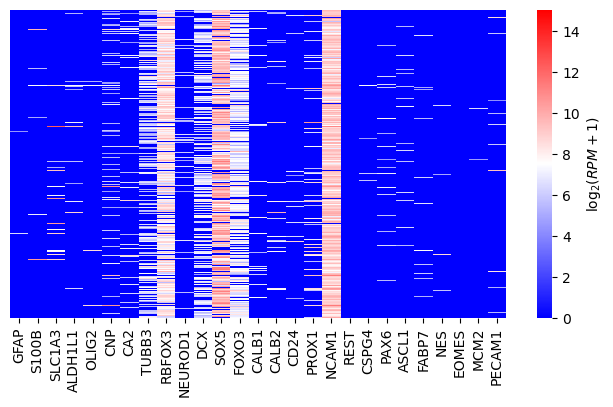

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(
    conf.data[cns_markers], ax=ax, cmap="bwr",
    vmax=conf.data.max().max(),
    vmin=conf.data.min().min(),
    yticklabels=False
)
ax.set(ylabel="")
ax.collections[0].colorbar.set_label("$\log_2(RPM+1)$");

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/heatmap.png", **conf.fig_kwarg)

---
## tSNE

In [25]:
perp = 50

df_tsne = pd.DataFrame(
    TSNE(perplexity=perp, init="pca", random_state=0).fit_transform(conf.data[cns_markers]),
    index=conf.data.index,
    columns=[f"tSNE{i+1}" for i in np.arange(2)]
)

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [26]:
class_dict = {v:i for i, v in enumerate(conf.label_df.class_label.unique())}
class_color = [
    plt.cm.jet(class_dict[v] / len(class_dict)) for v in class_dict
]

subclass_dict = {v:i for i, v in enumerate(conf.label_df.subclass_label.unique())}
subclass_color = [
    plt.cm.jet(subclass_dict[v] / len(subclass_dict)) for v in subclass_dict
]

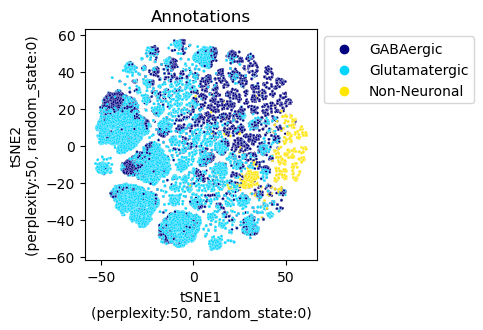

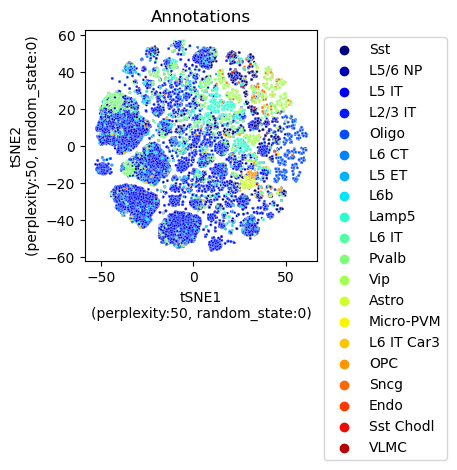

In [27]:
for hue, palette, name in zip(
    [conf.label_df.class_label, conf.label_df.subclass_label],
    [class_color, subclass_color],
    ["class", "subclass"]
):

    fig, ax = plt.subplots(
        figsize=(3, 3)
    )

    sns.scatterplot(
        data=df_tsne, x="tSNE1", y="tSNE2",
        hue=hue,
        palette=palette,
        **dict(s=3)
    )

    ax.set(
        xlabel="tSNE1\n(perplexity:50, random_state:0)",
        ylabel="tSNE2\n(perplexity:50, random_state:0)",
        title="Annotations"
    )

    ax.legend(
        bbox_to_anchor=(1, 1)
    );

    if conf.save_file:
        plt.savefig(f"{conf.save_dir}/clustering_{name}.png", **conf.fig_kwarg)

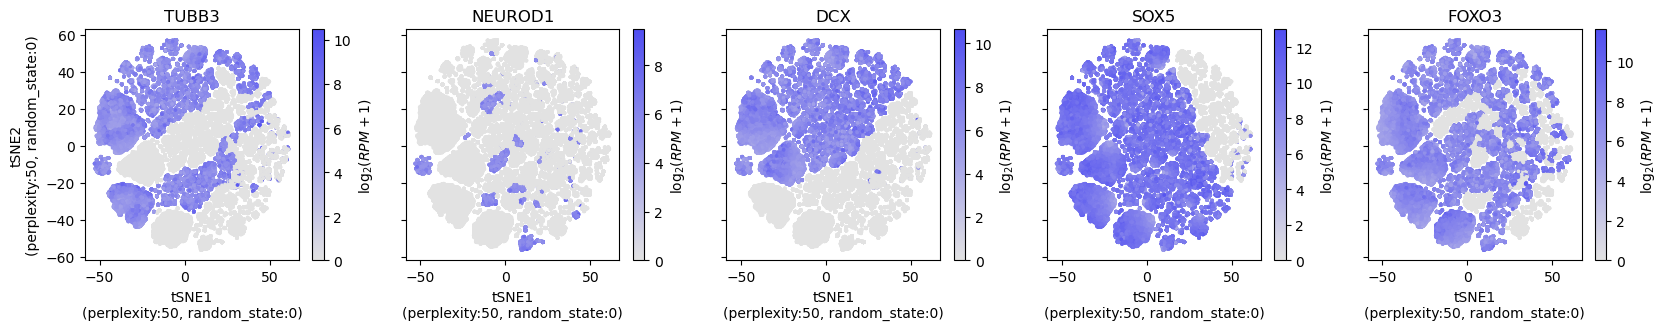

In [30]:
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(20, 3))

for i, v in enumerate(["TUBB3", "NEUROD1", "DCX", "SOX5", "FOXO3"]):
    
    df_tsne.plot.scatter(0, 1, c=conf.data.loc[:, v], cmap=seurat, ax=ax[i], s=3)

    ax[i].set(
        xlabel="tSNE1\n(perplexity:50, random_state:0)",
        ylabel="tSNE2\n(perplexity:50, random_state:0)",
        title=f"{v}"
    )
    
    ax[i].collections[0].colorbar.set_label("$\log_2(RPM+1)$");

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/neuronal_markers.png", **conf.fig_kwarg)

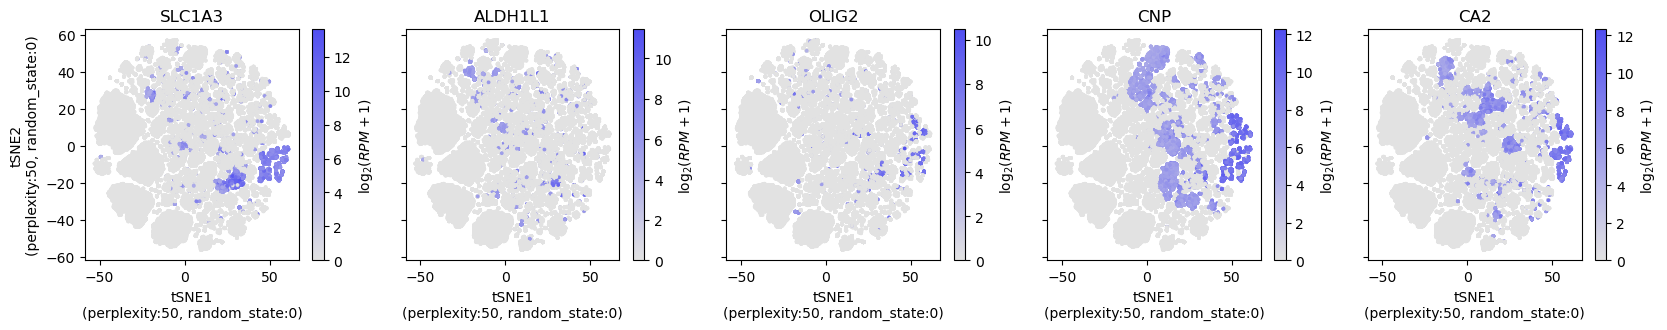

In [31]:
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(20, 3))

for i, v in enumerate(["SLC1A3", "ALDH1L1", "OLIG2", "CNP", "CA2"]):
    
    df_tsne.plot.scatter(0, 1, c=conf.data.loc[:, v], cmap=seurat, ax=ax[i], s=3)

    ax[i].set(
        xlabel="tSNE1\n(perplexity:50, random_state:0)",
        ylabel="tSNE2\n(perplexity:50, random_state:0)",
        title=f"{v}"
    )
    
    ax[i].collections[0].colorbar.set_label("$\log_2(RPM+1)$");

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/glial_markers.png", **conf.fig_kwarg)